In [50]:
# imports 
import numpy as np
import monai
from monai.transforms import (
    Compose,
    LoadImage,
    Spacing,
    CenterSpatialCrop,
    ScaleIntensity,
    AsChannelLast,
    Resize,
    ResizeWithPadOrCrop
)

import itertools


from sklearn.model_selection import KFold

from monai.networks.nets import UNet

import math
import matplotlib.pyplot as plt
import glob
import torch
import SimpleITK as sitk

# MRI

In [54]:
transforms = Compose(
            [
                LoadImage(),
                #Spacing(pixdim=(1)),
                
                CenterSpatialCrop(roi_size=[200,200]),
                Resize([256, 256]),
                AsChannelLast(channel_dim=0), 
                ScaleIntensity(),
            ]
        )

image data shape: torch.Size([256, 256, 1])
label data shape: torch.Size([256, 256, 1])


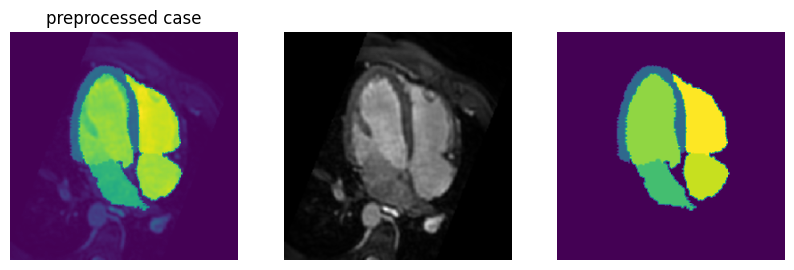

In [57]:
file_original = f"../other/MR_withGT/img4_slice2.nii.gz"
example_im_original = transforms(file_original)
print(f"image data shape: {example_im_original.shape}")

label_original = f"../other/MR_withGT/lab4_slice2.nii.gz"
example_label_original = transforms(label_original)
print(f"label data shape: {example_label_original.shape}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title(f"preprocessed case")
plt.axis("off")
plt.imshow((example_im_original + example_label_original*2) / 2)
plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(example_im_original, cmap="gray")
plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(example_label_original)
plt.show()

In [44]:
print(example_im_original[80:120,80:120,0])

metatensor([[ 631.,  706.,  781.,  ..., 1150., 1148., 1119.],
        [ 576.,  672.,  759.,  ..., 1143., 1136., 1111.],
        [ 555.,  638.,  733.,  ..., 1111., 1120., 1103.],
        ...,
        [ 949.,  973.,  973.,  ...,  301.,  473.,  661.],
        [ 951.,  961.,  950.,  ...,  426.,  573.,  700.],
        [ 936.,  945.,  933.,  ...,  520.,  619.,  695.]])
